# **Tubes Machine Learning 2** 
# **Classification**

# Muhammad Zalfa Thoriq (1301194473)
# Mega Vebika Shyahrin (1301194456) 

# **IMPORT LIBRARY PYTHON**

In [1]:
# import packages data 
import pandas as pd
import pandas as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# **EXPLORATION & PROCESSING DATA**

In [3]:
# read data kendarran train
data_1 = pd.read_excel('kendaraan_train.xlsx')
data_1.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,Wanita,30.0,1.0,33.0,1,< 1 Tahun,Tidak,28029.0,152.0,97.0,0.0
1,2.0,Pria,48.0,1.0,39.0,0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0.0
2,3.0,NaN,21.0,1.0,46.0,1,< 1 Tahun,Tidak,32733.0,160.0,119.0,0.0
3,4.0,Wanita,58.0,1.0,48.0,0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0.0
4,5.0,Pria,50.0,1.0,35.0,0,> 2 Tahun,NaN,34857.0,88.0,194.0,0.0


In [4]:
#read data kendaraan test
data_2 = pd.read_excel('kendaraan_test.xlsx')
data_2.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,22,1,52,0,1-2 Tahun,Pernah,32895,124,71,1
1,Pria,54,1,52,0,1-2 Tahun,Pernah,43388,124,198,0
2,Wanita,24,1,52,0,1-2 Tahun,Pernah,45032,124,171,0
3,Wanita,78,1,52,0,> 2 Tahun,Pernah,42825,26,208,1
4,Wanita,45,1,52,0,1-2 Tahun,Pernah,2630,26,228,0


In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285836 entries, 0 to 285835
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  float64
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271603 non-null  object 
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  float64
dtypes: float64(8), object(4)
memory usage: 26.2+ MB


In [6]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


# **CHECK MISSING VALUE**



In [7]:
# melihat type data kendaraan train
data_1.isnull().sum()

id                       5
Jenis_Kelamin        14445
Umur                 14219
SIM                  14409
Kode_Daerah          14311
Sudah_Asuransi       14233
Umur_Kendaraan       14280
Kendaraan_Rusak      14193
Premi                14574
Kanal_Penjualan      14304
Lama_Berlangganan    13997
Tertarik                 5
dtype: int64

In [8]:
# melihat type data kendaraan test
data_2.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

# **Processing Data**

In [9]:
#drop kolom yang tidak digunakan (hanya id yg didrop karena agar manyamakan data test)
data_1 = data_1.drop(columns=['id'])
data_1.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1,< 1 Tahun,Tidak,28029.0,152.0,97.0,0.0
1,Pria,48.0,1.0,39.0,0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0.0
2,NaN,21.0,1.0,46.0,1,< 1 Tahun,Tidak,32733.0,160.0,119.0,0.0
3,Wanita,58.0,1.0,48.0,0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0.0
4,Pria,50.0,1.0,35.0,0,> 2 Tahun,NaN,34857.0,88.0,194.0,0.0


In [10]:
#Drop data 
data_1 = data_1.dropna()
len(data_1)

data_2 = data_2.dropna()
len(data_2)

47639

**HANDLE DATA**

In [11]:
# Melakukan handle data agar semua data menjadi angka

# mengubah data jenis kelamin menjadi angka
dummies = pd.get_dummies(data_1['Jenis_Kelamin'], prefix='kelamin')
data_1 = pd.concat([data_1, dummies], axis=1)
data_1 = data_1.drop(['Jenis_Kelamin'], axis = 1)

dummies = pd.get_dummies(data_2['Jenis_Kelamin'], prefix='kelamin')
data_2 = pd.concat([data_2, dummies], axis=1)
data_2 = data_2.drop(['Jenis_Kelamin'], axis = 1)

# mengubah data kendaraan rusak menjadi angka
dummies = pd.get_dummies(data_1['Kendaraan_Rusak'], prefix='kendaraan_rusak')
data_1 = pd.concat([data_1, dummies], axis=1)
data_1 = data_1.drop(['Kendaraan_Rusak'], axis = 1)

dummies = pd.get_dummies(data_2['Kendaraan_Rusak'], prefix='kendaraan_rusak')
data_2 = pd.concat([data_2, dummies], axis=1)
data_2 = data_2.drop(['Kendaraan_Rusak'], axis = 1)

# mengubah data umur kendaraan menjadi angka
dummies = pd.get_dummies(data_1['Umur_Kendaraan'], prefix='Umur_kendaraan')
data_1 = pd.concat([data_1, dummies], axis=1)
data_1 = data_1.drop(['Umur_Kendaraan'], axis = 1)

dummies = pd.get_dummies(data_2['Umur_Kendaraan'], prefix='Umur_kendaraan')
data_2 = pd.concat([data_2, dummies], axis=1)
data_2 = data_2.drop(['Umur_Kendaraan'], axis = 1)

In [12]:
data_1.head()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,kelamin_Pria,kelamin_Wanita,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak,Umur_kendaraan_1-2 Tahun,Umur_kendaraan_< 1 Tahun,Umur_kendaraan_> 2 Tahun
0,30.0,1.0,33.0,1,28029.0,152.0,97.0,0.0,0,1,0,1,0,1,0
1,48.0,1.0,39.0,0,25800.0,29.0,158.0,0.0,1,0,1,0,0,0,1
3,58.0,1.0,48.0,0,2630.0,124.0,63.0,0.0,0,1,0,1,1,0,0
5,21.0,1.0,35.0,1,22735.0,152.0,171.0,0.0,1,0,0,1,0,1,0
8,20.0,1.0,8.0,1,30786.0,160.0,31.0,0.0,0,1,0,1,0,1,0


In [13]:
data_2.head()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,kelamin_Pria,kelamin_Wanita,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak,Umur_kendaraan_1-2 Tahun,Umur_kendaraan_< 1 Tahun,Umur_kendaraan_> 2 Tahun
0,22,1,52,0,32895,124,71,1,0,1,1,0,1,0,0
1,54,1,52,0,43388,124,198,0,1,0,1,0,1,0,0
2,24,1,52,0,45032,124,171,0,0,1,1,0,1,0,0
3,78,1,52,0,42825,26,208,1,0,1,1,0,0,0,1
4,45,1,52,0,2630,26,228,0,0,1,1,0,1,0,0


# **Histogram**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdff0208d0>,
      dtype=object)

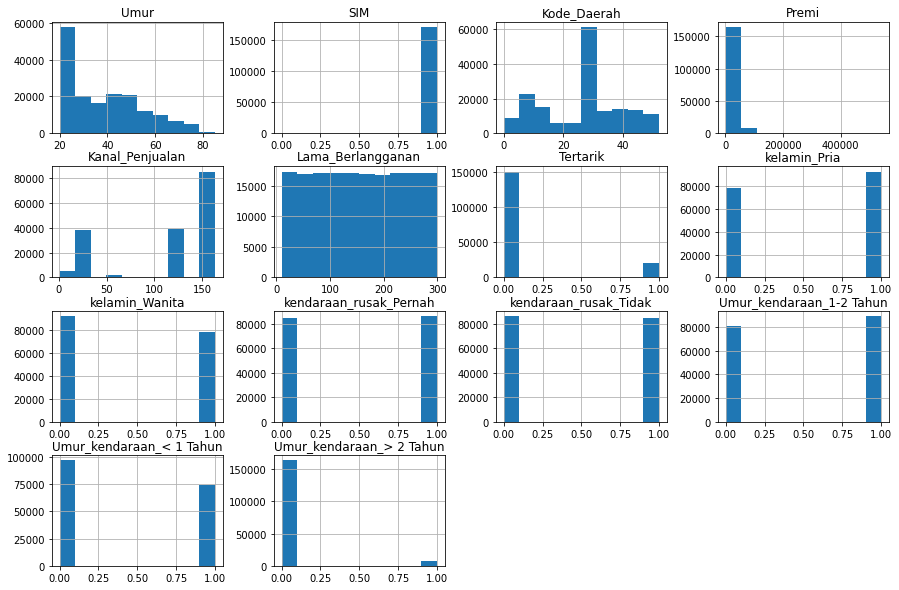

In [14]:
data_1.hist(figsize = [15,10])

# **HEATMAP**

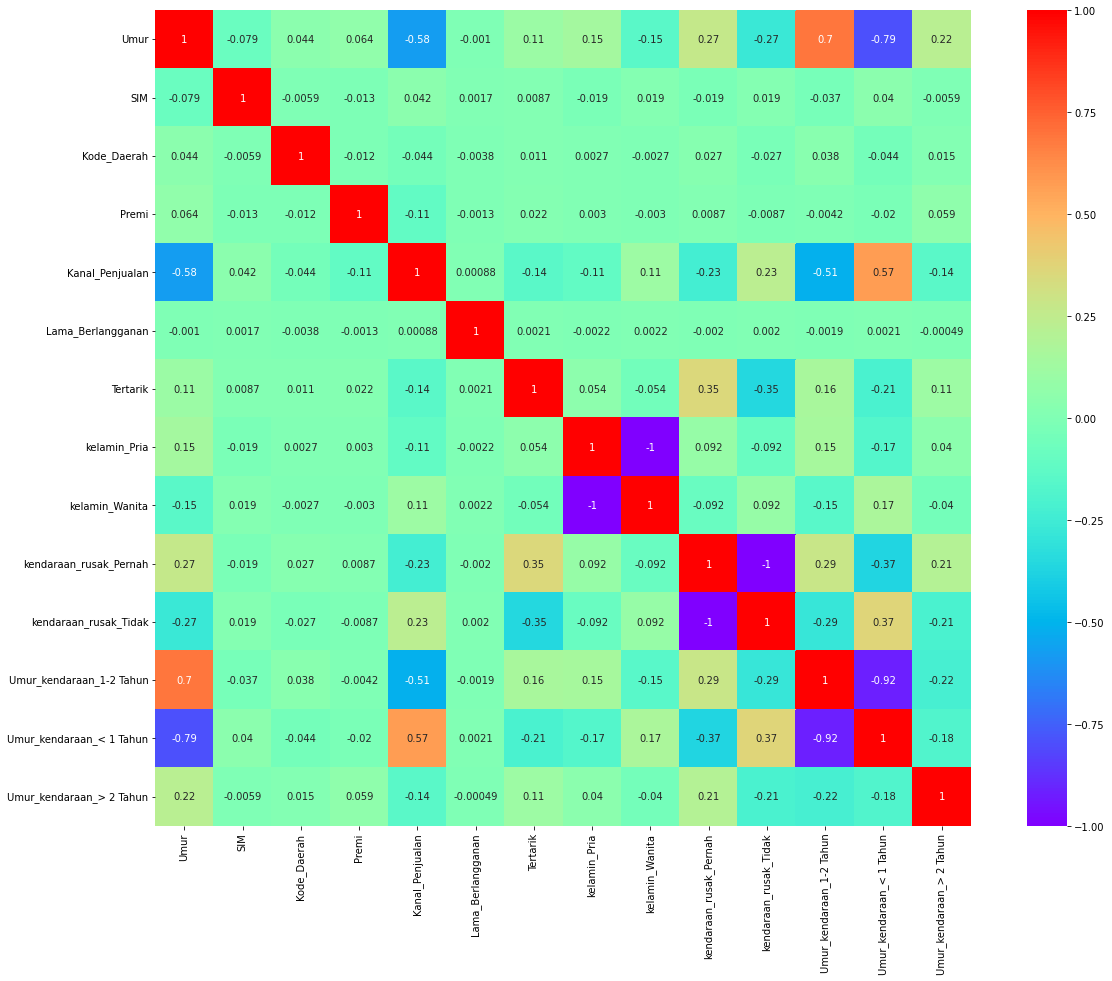

In [15]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data_1.corr(), annot=True, ax=ax, square=True, cmap='rainbow', vmin=-1,vmax=1, annot_kws={'size': 10})
plt.show()

# **SELEKSI DATA**

In [16]:
# memisahkan Data tertarik pada kendaraan train
t1 = data_1.drop(["Tertarik"], axis = 1)
t1.head()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,kelamin_Pria,kelamin_Wanita,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak,Umur_kendaraan_1-2 Tahun,Umur_kendaraan_< 1 Tahun,Umur_kendaraan_> 2 Tahun
0,30.0,1.0,33.0,1,28029.0,152.0,97.0,0,1,0,1,0,1,0
1,48.0,1.0,39.0,0,25800.0,29.0,158.0,1,0,1,0,0,0,1
3,58.0,1.0,48.0,0,2630.0,124.0,63.0,0,1,0,1,1,0,0
5,21.0,1.0,35.0,1,22735.0,152.0,171.0,1,0,0,1,0,1,0
8,20.0,1.0,8.0,1,30786.0,160.0,31.0,0,1,0,1,0,1,0


In [17]:
# memisahkan Data tertarik pada kendaraan test
t2 = data_2.drop(["Tertarik"], axis = 1)
t2.head()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,kelamin_Pria,kelamin_Wanita,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak,Umur_kendaraan_1-2 Tahun,Umur_kendaraan_< 1 Tahun,Umur_kendaraan_> 2 Tahun
0,22,1,52,0,32895,124,71,0,1,1,0,1,0,0
1,54,1,52,0,43388,124,198,1,0,1,0,1,0,0
2,24,1,52,0,45032,124,171,0,1,1,0,1,0,0
3,78,1,52,0,42825,26,208,0,1,1,0,0,0,1
4,45,1,52,0,2630,26,228,0,1,1,0,1,0,0


In [18]:
# menampilkan hanya data tertarik pada kendaraan train
tertarik_1 = data_1["Tertarik"]
tertarik_1.head()

0    0.0
1    0.0
3    0.0
5    0.0
8    0.0
Name: Tertarik, dtype: float64

In [19]:
# menampilkan hanya data tertarik pada kendaraan train
tertarik_2 = data_2["Tertarik"]
tertarik_2.head()

0    1
1    0
2    0
3    1
4    0
Name: Tertarik, dtype: int64

# **CLASSIFICATION MENGGUNAKAN KNN**

**EVALUASI**

In [20]:
knn = []
for k in range(1,5):
    knn_Class = KNeighborsClassifier(n_neighbors = k)
    knn_Class.fit(t1, tertarik_1)
    knn.append(knn_Class.score(t2, tertarik_2))

Text(0.5, 1.0, 'Score K Classifier untuk nilai K yang berbeda')

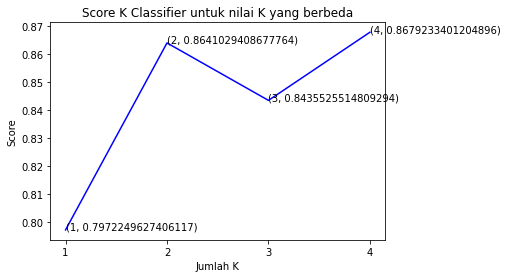

In [21]:
plt.plot([k for k in range(1, 5)], knn, color = 'blue')
for i in range(1,5):
    plt.text(i, knn[i-1], (i, knn[i-1]))
plt.xticks([i for i in range(1, 5)])
plt.xlabel('Jumlah K')
plt.ylabel('Score')
plt.title('Score K Classifier untuk nilai K yang berbeda')

# **EKSPERIMEN**

In [29]:
# KNN
knn = KNeighborsClassifier (n_neighbors = 4)

In [30]:
# memasukkan data train pada fungsi classification untuk KNN
knn.fit(t1, tertarik_1)

KNeighborsClassifier(n_neighbors=4)

**PREDIKSI**

In [31]:
# prediksi
prediksi = knn.predict (t2)
prediksi

array([0., 0., 0., ..., 0., 0., 0.])

**PROBABILITAS**

In [32]:
# probabilitas
knn.predict_proba(t2) 

array([[1.  , 0.  ],
       [0.5 , 0.5 ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.75, 0.25]])

**MATRIX**

In [33]:
# menampilkan matrix hasil prediksi (atas benar, bawah salah, kiri true, kanan false)
print(confusion_matrix(tertarik_2, prediksi))

[[41177   601]
 [ 5691   170]]


**HASIL PREDIKSI**

In [34]:
# finalisasi hasil prediksi
print(classification_report(tertarik_2, prediksi))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     41778
           1       0.22      0.03      0.05      5861

    accuracy                           0.87     47639
   macro avg       0.55      0.51      0.49     47639
weighted avg       0.80      0.87      0.82     47639

